# ANALYSIS OF CO2 INTENSITY OF ELECTRICITY GENERATION IN EU COUNTRIES

<img src="https://iea.imgix.net/69f767b9-6676-4345-a1ea-9dc410ae5990/GettyImages-1303511343.png?auto=compress%2Cformat&fit=min&q=80&rect=0%2C0%2C3991%2C2245&w=1220&fit=crop&fm=jpg&q=70&auto=format&h=686" width="700" height="600">


Electricity generation gives rise to negative impacts on the environment and human health throughout all stages of its life-cycle. To date, power generation remains the largest GHG-emitting sector in Europe. Carbon dioxide (CO2) is by far the most commonly-emitted GHG across the sector, being a product of combustion processes. An almost complete decarbonisation of the EU’s electricity sector is needed in order to meet the EU’s objective of becoming the first carbon-neutral continent by 2050. <br>Electricity can play an increasing role in decarbonising energy use across a number of sectors, such as transport, industry and households. Information about the carbon intensity of electricity generation is therefore relevant for many stakeholders. The EEA and its European Topic Centre for Climate Change Mitigation and Energy (ETC/CME) produce each year country- and EU-level data on the average annual CO2 emission intensity of electricity generation.


In this notebook, we will analyze the CO2 intensity in EU countries. The dataset was taken from KAGGLE, and can be found in this link:

https://www.kaggle.com/datasets/mathchi/co2-intensity-of-electricity-generation/

---

## Importing Libraries

In [141]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

## Reading the dataset

Sice in the current directory, we have a zip file downloaded from the KAGGLE Dataset, we will begin by extracting the deta from this zip file.

In [142]:
# File name
file_name = 'CO2.zip'

file = zipfile.ZipFile(file_name)

# Printing all files in the zip file
for i in file.filelist:
    print(i.filename)

2017_CO2_IntensEL_EEA.csv


In [143]:
# Openning the zip file and reading the provided csv file from KAGGLE

with file.open('2017_CO2_IntensEL_EEA.csv') as f:
    df = pd.read_csv(f)

df.head()

,CountryShort,CountryLong,Year,ValueNumeric,Unit,Data_source
0,EU28,EU-28,1990,531.232975,gCO2/kWh,EEA
1,EU28,EU-28,1991,516.034467,gCO2/kWh,EEA
2,EU28,EU-28,1992,503.571112,gCO2/kWh,EEA
3,EU28,EU-28,1993,473.999118,gCO2/kWh,EEA
4,EU28,EU-28,1994,469.013303,gCO2/kWh,EEA


## Exploring the Dataset

In [144]:
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset contains 924 rows and 6 columns


In [145]:
# Printing the columns of the dataset

print('Columns in this dataset are:')
for column in df.columns:
    print(column)

Columns in this dataset are:
CountryShort
CountryLong
Year
ValueNumeric
Unit
Data_source


The columns that are shown in this dataset represent these informations:

**CountryShort**  - The abbreviation of country name <br>
**CountryLong**   - Country name <br>
**Year**          - Year in which the related CO2 intensity is measured <br>
**ValueNumeric**  - The value of CO2 intensity <br>
**Unit**          - The units 'gCO2eq/kWh' are grams of carbon dioxide equivalent per kilowatt-hour of electricity generated <br>
**Data_source**   - The source that the data is provided from <br>

We will rename some of these columns for better analysis!

In [146]:
# Renameing columns for cleaner analysis

df.rename(columns={'CountryShort':'Country_Abr',
                  'CountryLong':'Country_Name',
                  'ValueNumeric':'CO2_Intensity'}, inplace = True)

Firstly lets check if we have any null values in this dataframe

In [147]:
df.isnull().sum()

Country_Abr      0
Country_Name     0
Year             0
CO2_Intensity    0
Unit             0
Data_source      0
dtype: int64

There are no null valus in this df.


**Dataframe Infos**

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country_Abr    924 non-null    object 
 1   Country_Name   924 non-null    object 
 2   Year           924 non-null    int64  
 3   CO2_Intensity  924 non-null    float64
 4   Unit           924 non-null    object 
 5   Data_source    924 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 43.4+ KB


The output of the above cell, tells us informations about the whole dataframe (This includes the amount of non-null values, data types of each colum alongside with column names and so on.)

In [149]:
# Printing the descriptive statisticts of the dataframe

df.describe(include='all')

,Country_Abr,Country_Name,Year,CO2_Intensity,Unit,Data_source
count,924,924,924.000000,924.000000,924,924
unique,33,33,NaN,NaN,1,1
top,EU28,EU-28,NaN,NaN,gCO2/kWh,EEA
freq,28,28,NaN,NaN,924,924
mean,NaN,NaN,2003.500000,421.214865,NaN,NaN
std,NaN,NaN,8.082122,288.540983,NaN,NaN
min,NaN,NaN,1990.000000,-0.089447,NaN,NaN
25%,NaN,NaN,1996.750000,191.996947,NaN,NaN
50%,NaN,NaN,2003.500000,414.582838,NaN,NaN
75%,NaN,NaN,2010.250000,567.558263,NaN,NaN


Lets firstly observe which countries we have in the dataframe

In [150]:
# Showing unique countries and the number of rows each one has

df_grouped = df.groupby(['Country_Abr','Country_Name'])['Year'].count().reset_index()
df_grouped.rename(columns={'Year':'#_of_Rows'}, inplace = True)
df_grouped

,Country_Abr,Country_Name,#_of_Rows
0,AT,Austria,28
1,BE,Belgium,28
2,BG,Bulgaria,28
3,CY,Cyprus,28
4,CZ,Czech Republic,28
5,DE,Germany,28
6,DK,Denmark,28
7,EE,Estonia,28
8,EL,Greece,28
9,ES,Spain,28


From the above df, we can observe that we have 28 rows for each country (CO2 Intensity from 1990 to 2017). Also, it can be seen that among the countries we have also the total data for EU countries - EU28 and EU27 (EU27 - Without UK). In this notebook, we will analyze the tha data for each country, beacause of this we will filter the df with only countries!

In [151]:
# Filtering rows with only countrie informations and creating a new dataframe!

df_countries = df.loc[(df['Country_Abr'] != 'EU27') & (df['Country_Abr'] != 'EU28')]
df_countries

,Country_Abr,Country_Name,Year,CO2_Intensity,Unit,Data_source
56,AT,Austria,1990,235.499596,gCO2/kWh,EEA
57,AT,Austria,1991,243.986584,gCO2/kWh,EEA
58,AT,Austria,1992,189.693853,gCO2/kWh,EEA
59,AT,Austria,1993,171.888602,gCO2/kWh,EEA
60,AT,Austria,1994,190.765413,gCO2/kWh,EEA
...,...,...,...,...,...,...
919,NO,Norway,2013,20.978275,gCO2/kWh,EEA
920,NO,Norway,2014,21.272071,gCO2/kWh,EEA
921,NO,Norway,2015,19.836942,gCO2/kWh,EEA
922,NO,Norway,2016,18.271347,gCO2/kWh,EEA


After we learned what countries we have in the df, lets observe also what YEARs data we have!

In [152]:
# Printing the unique years in the df

unique_years_array = df_countries['Year'].unique()

print('In the dataset we have information for these years:')
print(' ')
print(unique_years_array)
print(' ')
print('So we have data from {} until {}, for each of these EU countries'.format(min(unique_years_array), max(unique_years_array)))

In the dataset we have information for these years:
 
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
 
So we have data from 1990 until 2017, for each of these EU countries


## Exploratory Data Analysis

**Plotting the total CO2 Intensity in EU countries through the years**

In [153]:
# Creating a df to calculate the change ratio of CO2 intensity for each 5 years

# Setting the years to filter
start_year = 1990

years_list = []

while start_year < 2017:
    years_list.append(start_year)
    # Incrementing each year by 5
    start_year = start_year + 5 
    
df_target_years = df_countries.loc[df_countries['Year'].isin(years_list)].groupby('Year')['CO2_Intensity'].sum().reset_index()

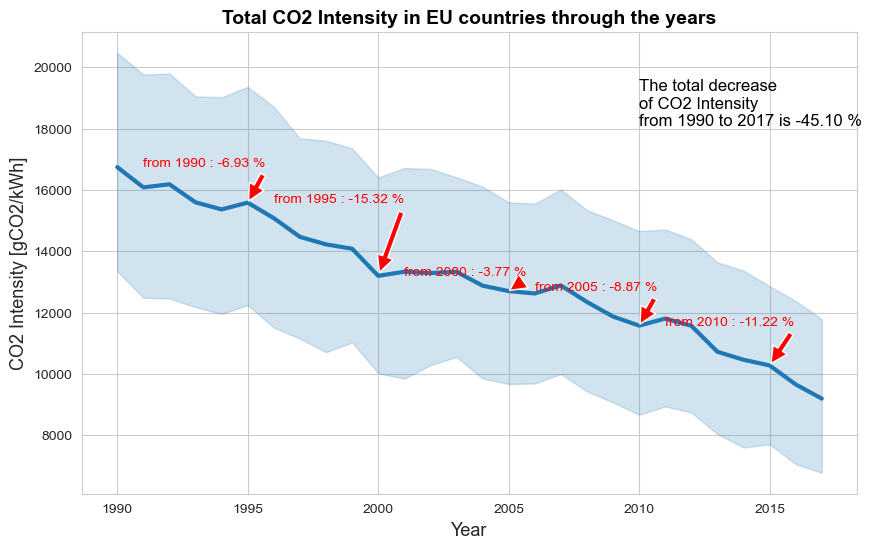

In [154]:
# Setting the 'whitegrid' for better visualization
sns.set_style('whitegrid')

# Plotting the total CO2 Intensity in EU countries through the years

fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=df_countries, x='Year', y='CO2_Intensity', estimator=sum, lw=3)

plt.title('Total CO2 Intensity in EU countries through the years', fontweight='bold', fontsize=14, color='Black')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO2 Intensity [gCO2/kWh]', fontsize=13)

# Adding the total decrease text on the right top of the chart
df_min_max = df_countries.loc[df_countries['Year'].isin([1990, 2017])].groupby('Year')['CO2_Intensity'].sum().reset_index()
total_dectrase_ratio = ((df_min_max['CO2_Intensity'].min() - df_min_max['CO2_Intensity'].max()) / df_min_max['CO2_Intensity'].max()) * 100

total_decrease_text = f'The total decrease\nof CO2 Intensity \nfrom 1990 to 2017 is {total_dectrase_ratio:.2f} %'
plt.text(2010, 18100, total_decrease_text, fontsize=12, color='black')
    

# Calculating and adding decrease ratio annotations
for i in range(1, len(df_target_years)):
    x1, y1 = df_target_years['Year'][i - 1], df_target_years['CO2_Intensity'][i - 1]
    x2, y2 = df_target_years['Year'][i], df_target_years['CO2_Intensity'][i]
    
    decrease_ratio = ((y2 - y1) / (y1)) * 100
    text = f'from {x1} : {decrease_ratio:.2f} %'
    
    # Adding arrow and text annotation
    plt.annotate(text, (x2, y2), xytext=(x1 + 1, y1 + 10), fontsize=10, color='red',
                 arrowprops=dict(facecolor='red', shrink=0.05))
    
plt.show()

**Plotting the CO2 Intensity for each EU countries through the years**

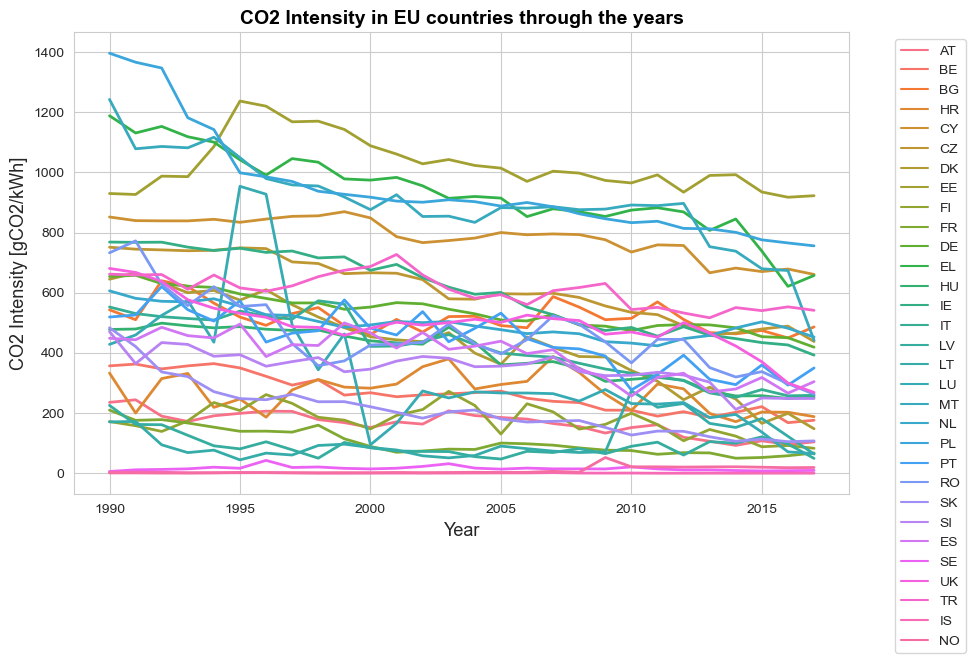

In [155]:
# Plotting the CO2 Intensity for each EU country through the years
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the lineplot
sns.lineplot(data=df_countries, x='Year', y='CO2_Intensity', hue='Country_Abr', lw=2)

# Setting title and labels
plt.title('CO2 Intensity in EU countries through the years', fontweight='bold', fontsize=14, color='black')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO2 Intensity [gCO2/kWh]', fontsize=13)

# Moveing the legend outside the chart and create two columns
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Plotting the average CO2 Intensity for each EU countries during this period**

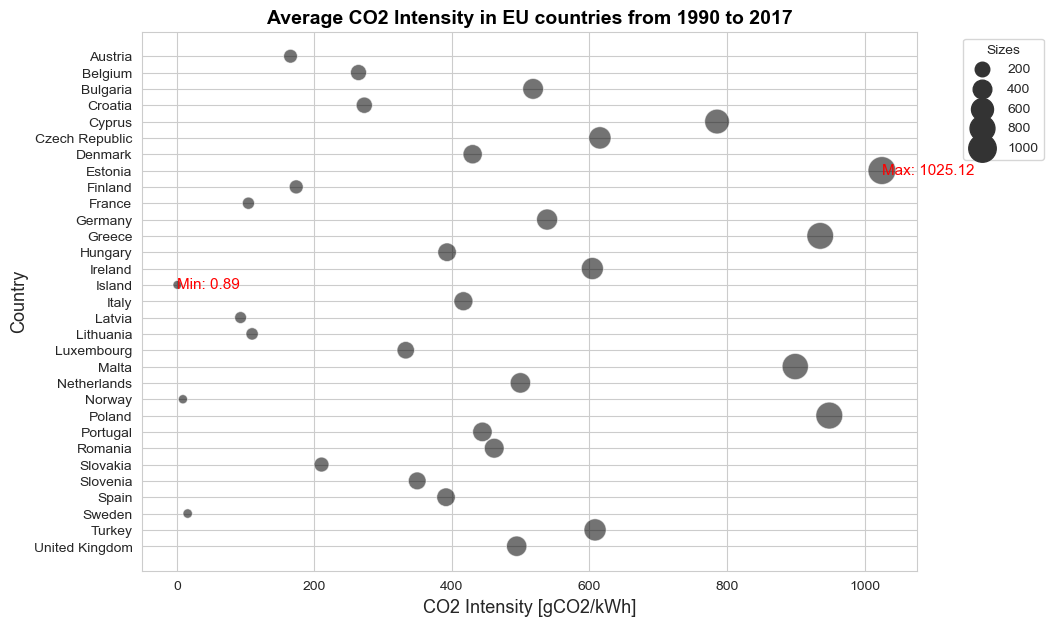

In [156]:
# Calculating the average CO2 intensity for each country during 1990 to 2017
average_CO2_Intensity = df_countries.groupby('Country_Name')['CO2_Intensity'].mean().reset_index()

# Finding the country with the maximum and minimum average values
max_country = average_CO2_Intensity.loc[average_CO2_Intensity['CO2_Intensity'].idxmax()]
min_country = average_CO2_Intensity.loc[average_CO2_Intensity['CO2_Intensity'].idxmin()]

# Plotting the average CO2 Intensity for each EU country through the years
plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(x='CO2_Intensity', y='Country_Name', data=average_CO2_Intensity, 
                             size='CO2_Intensity', sizes=(40, 400), color='black', alpha=0.55)


# Adding text for the maximum and minimum values
plt.text(max_country['CO2_Intensity'], max_country['Country_Name'], f'Max: {max_country["CO2_Intensity"]:.2f}', fontsize=11, color='red', verticalalignment='center', horizontalalignment='left')
plt.text(min_country['CO2_Intensity'], min_country['Country_Name'], f'Min: {min_country["CO2_Intensity"]:.2f}', fontsize=11, color='red', verticalalignment='center', horizontalalignment='left')

# Setting title and labels
plt.title('Average CO2 Intensity in EU countries from 1990 to 2017', fontweight='bold', fontsize=14, color='black')
plt.xlabel('CO2 Intensity [gCO2/kWh]', fontsize=13)
plt.ylabel('Country', fontsize=13)
plt.legend(title='Sizes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Plotting the change ratio CO2 Intensity for each EU countries during this period**

In [157]:
# Calculateing the change ratio of CO2 intensity from 1990 to 2017 for each country
df_change = df_countries.loc[(df_countries['Year'] == 1990) | (df_countries['Year'] == 2017)]

# Pivoting the data
df_change = df_change.pivot_table(index="Country_Name", columns="Year", values="CO2_Intensity")
df_change = df_change.reset_index()
df_change.rename(columns={1990: "1990", 2017: "2017"}, inplace=True)
df_change["ChangeRatio"] = (df_change["2017"] / df_change["1990"] - 1) * 100
df_change["Average"] = (df_change["2017"] + df_change["1990"]) / 2

# Fitlering out countries with very low CO2 Intension
df_change = df_change.loc[df_change['Average'] >= 10].copy()

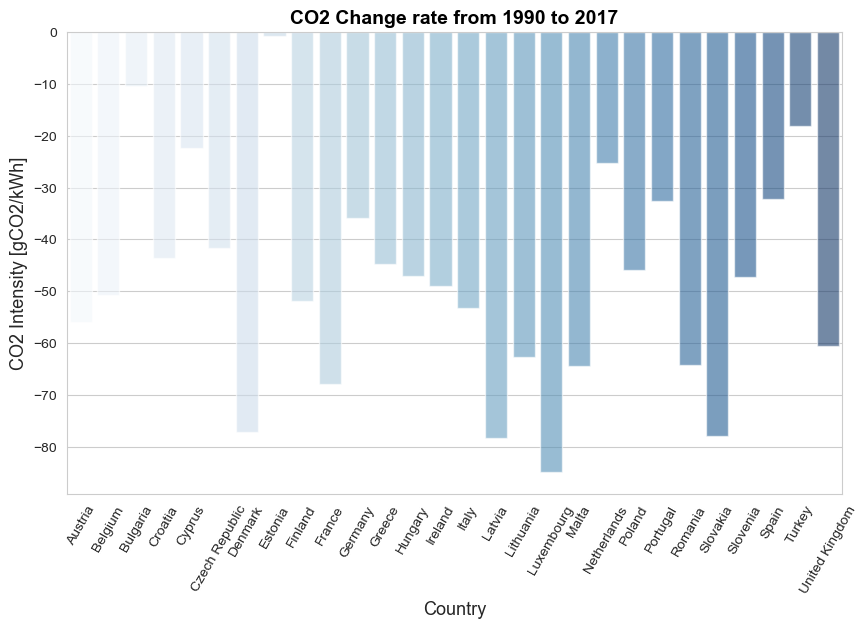

In [158]:
# Plotting the change ratio of CO2 Intensity for each EU country through the years

plt.figure(figsize=(10, 6))
sns.barplot(data=df_change, x='Country_Name', y='ChangeRatio',palette='Blues', alpha=0.6)

# Setting title and labels
plt.title('CO2 Change rate from 1990 to 2017', fontweight='bold', fontsize=14, color='black')
plt.xlabel('Country', fontsize=13)
plt.ylabel('CO2 Intensity [gCO2/kWh]', fontsize=13)

plt.xticks(rotation = 60)

plt.show()

In [179]:
lowest_change_country = df_change[df_change['ChangeRatio'] == df_change['ChangeRatio'].max()][['Country_Name', 'ChangeRatio']].values[0,0]
lowest_change_ratio = df_change[df_change['ChangeRatio'] == df_change['ChangeRatio'].max()][['Country_Name', 'ChangeRatio']].values[0,1]

print('The country with the lowest change ratio of CO2 Intensity is: {}, with only {} % decrease'.format(lowest_change_country, lowest_change_ratio))

The country with the lowest change ratio of CO2 Intensity is: Estonia, with only -0.7899526720588801 % decrease


**Map plotting the CO2 Intensity for each EU countries in 2017**

In [160]:
# Creating a dataframe with only 2017 rows

df_latest = df_countries.loc[df_countries['Year'] == 2017].copy()

In [161]:
# Reading the GeoDataFrame with country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Creating a list of unique standardized country names from the world dataframe

standardized_country_names = world['name'].tolist()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4728\2777680308.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Since we may encounter countries that are named not exactly the same, it is better to perform fuzzy matching while matching dataframes!

In [162]:
# Performing fuzzy matching for each country name in df_max_type

def fuzzy_match_country(row):
    match, score = process.extractOne(row['Country_Name'], standardized_country_names, scorer=fuzz.ratio)
    if score >= 50:  # Adjust the threshold as needed
        return match
    else:
        return None
    
df_latest['Matched_Country'] = df_latest.apply(fuzzy_match_country, axis=1)

In [163]:
# Merging the dataframes using the matched country names

merged_data_fuzzy = world.merge(df_latest, left_on='name', right_on='Matched_Country', how='left')
merged_data_fuzzy.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country_Abr,Country_Name,Year,CO2_Intensity,Unit,Data_source,Matched_Country
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# Dropping countries that are not matched
merged_data_fuzzy.dropna(axis=0, inplace = True)

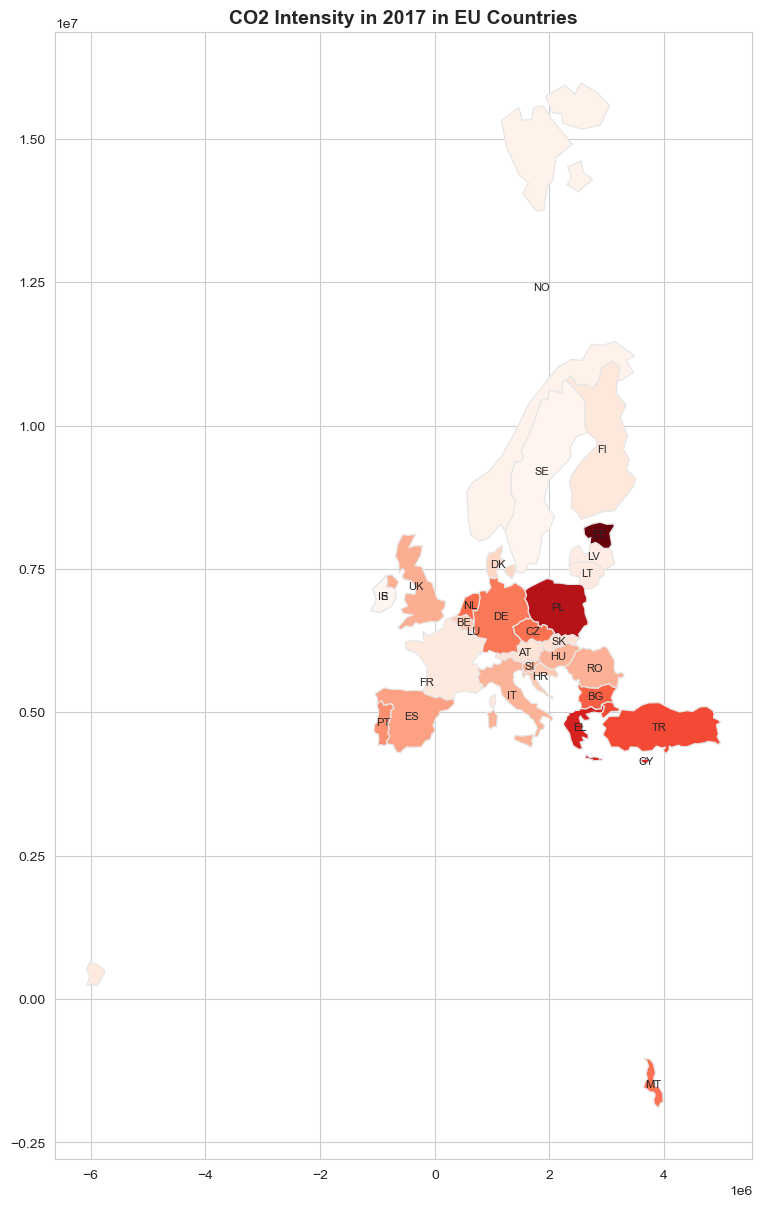

In [185]:
# Defineing the projected CRS (e.g., Web Mercator)
desired_crs = 'EPSG:3857' 

# Reprojecting the GeoDataFrame to the desired CRS
merged_data_fuzzy = merged_data_fuzzy.to_crs(desired_crs)

# Setting up the plot with a colored background
fig, ax = plt.subplots(1, 1, figsize=(9, 18))

# Setting the background color
ax.set_facecolor('white')  # Change 'white' to the desired background color

# Setting the chart coordinate limits
# ax.set_xlim(-2000000, 5000000)
# ax.set_ylim(4000000, 12000000)

# Ploting the choropleth map with color based on CO2_Intensity
merged_data_fuzzy.plot(column='CO2_Intensity', cmap='Reds', linewidth=0.9, ax=ax, edgecolor='0.9')

# Customizeing the plot
ax.set_title('CO2 Intensity in 2017 in EU Countries', fontsize=14, fontweight='bold')

# Annotateing country abbreviations on the map
for x, y, label in zip(merged_data_fuzzy.geometry.centroid.x, merged_data_fuzzy.geometry.centroid.y, merged_data_fuzzy['Country_Abr']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

# Showing the plot
plt.show()


## Conclusions

In summary, our analysis of the provided dataframe reveals significant insights regarding CO2 yearly intensity in European countries from 1990 to 2017:

1. **CO2 Intensity Overview**: The dataframe contains data on CO2 yearly intensity in gCO2/kWh for European countries over this 27-year period, shedding light on their environmental performance.

2. **Overall Reduction**: The data indicates a noteworthy overall decrease in CO2 intensity of 45.10% from 1990 to 2017. This represents a substantial and positive trend in reducing carbon emissions.

3. **Largest Decrease**: The most significant reduction occurred in the five-year interval from 1995 to 2002, with an impressive 15.32% decrease in CO2 intensity. This period stands out as a key milestone in environmental improvement.

4. **Estonia's High Intensity**: Estonia emerged as the country with the highest average CO2 intensity during this period, signifying a concerning environmental performance.

5. **Lowest Decrease in Estonia**: Furthermore, Estonia demonstrated the lowest reduction in CO2 intensity among all the countries, with a decrease of less than 1%. This raises concerns about the effectiveness of their environmental policies.

6. **Island, Norway, and Sweden**: On a positive note, Iceland ranked as the country with the lowest average CO2 intensity, closely followed by Norway and Sweden. These countries are exemplary in terms of their environmental efforts.

7. **Regional Differences**: The map plot visually highlights that Eastern European countries, Balkan countries, and Estonia exhibited higher CO2 intensity in 2017 compared to the rest of Europe. This divergence emphasizes the need for targeted environmental measures in these regions.

In conclusion, this analysis provides valuable insights into the trends and disparities in CO2 intensity across European countries, showcasing both progress and areas of concern in the journey toward a more sustainable and eco-friendly future.

---

Author: Endrit Mustafa